In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [31]:
def f(x,y):
    return x + 2*y

In [32]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [33]:
N = 100
t = np.linspace(0,1,N)
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [34]:
h = t[1] - t[0]

In [35]:
yext = Solucion(t)

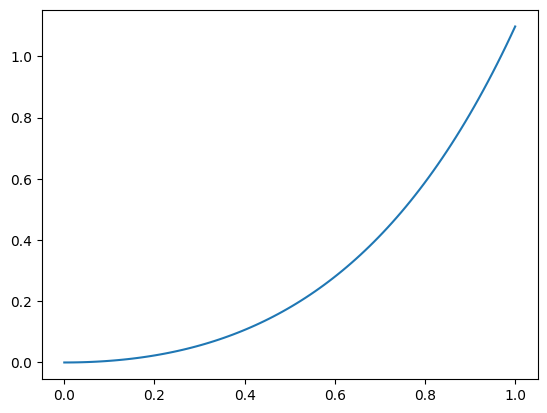

In [36]:
plt.plot(t,yext)

In [37]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1


In [38]:
y1 = np.zeros_like(t)
y1[0] = 0

In [39]:
GetEuler(t,y1,h)

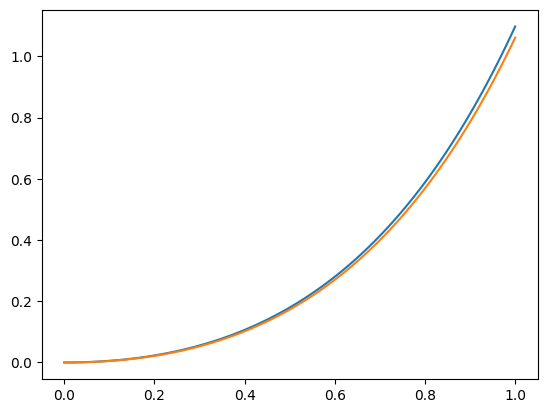

In [40]:
plt.plot(t,yext)
plt.plot(t,y1)

In [41]:
def fc(z):
    return 1j*z

In [42]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [54]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [55]:
Solucion1[-1,1]

(1.2177068419842307-0.010044860504615213j)

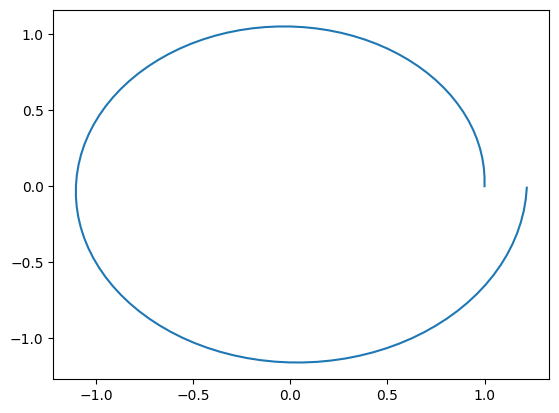

In [56]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

plt.plot(Re,Im)

In [61]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [62]:
def f(x,y):
    return x + 2*y

In [63]:
y2 = np.zeros_like(t)
y2[0] = 0.

In [64]:
GetEuler2(t,y2,h)

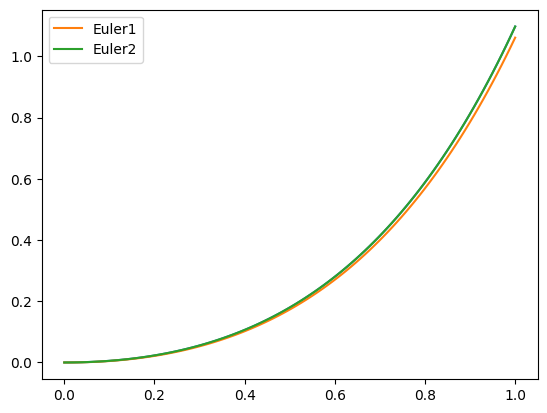

In [65]:
plt.plot(t,yext)
plt.plot(t,y1,label='Euler1')
plt.plot(t,y2,label='Euler2')
plt.legend()

In [67]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [68]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

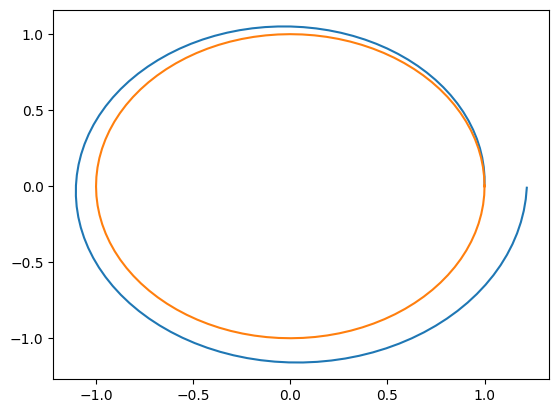

In [70]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])


plt.plot(Re,Im)
plt.plot(Re2,Im2)